In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load and preview the data
df = pd.read_csv('salary_analysis.csv')

# Data Preprocessing
def clean_salary(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        # Remove currency symbols and commas
        x = x.replace('$', '').replace(',', '').strip()
        try:
            return float(x)
        except:
            return np.nan
    return x

df['Annual salary'] = df['Annual salary'].apply(clean_salary)
df['Additional monetary compensation'] = df['Additional monetary compensation'].apply(clean_salary)

## Unit 1: Data Analysis and Visualization

### Question 1: Data Type Classification


In [ ]:
# missing files
print("Missing Values:")
print(df.isnull().sum())

# duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check unique values in categorical columns
for col in ['Industry', 'Currency', 'Country']:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Missing Values:
Timestamp                                            0
Age                                                  0
DOB                                               1441
Industry                                            90
Job title                                            1
Additional context                               20819
Annual salary                                     2832
Additional monetary compensation                  7306
Currency                                             0
Country                                              0
City                                                82
Years of professional work experience overall        0
Highest level of education completed               222
Gender                                             177
dtype: int64

Duplicate Rows: 0

Data Types:
Timestamp                                         object
Age                                                int64
DOB                                               objec

In [7]:
# Central tendency measures
numeric_cols = ['Age', 'Annual salary', 'Additional monetary compensation']
summary_stats = df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics:")
print(summary_stats)



Summary Statistics:
               Age  Annual salary  Additional monetary compensation
mean     60.476216   3.893409e+05                      1.815342e+04
median   45.000000   7.500000e+04                      2.000000e+03
std      88.975775   3.818284e+07                      8.337722e+05
min       1.000000   0.000000e+00                      0.000000e+00
max     600.000000   6.000070e+09                      1.200000e+08


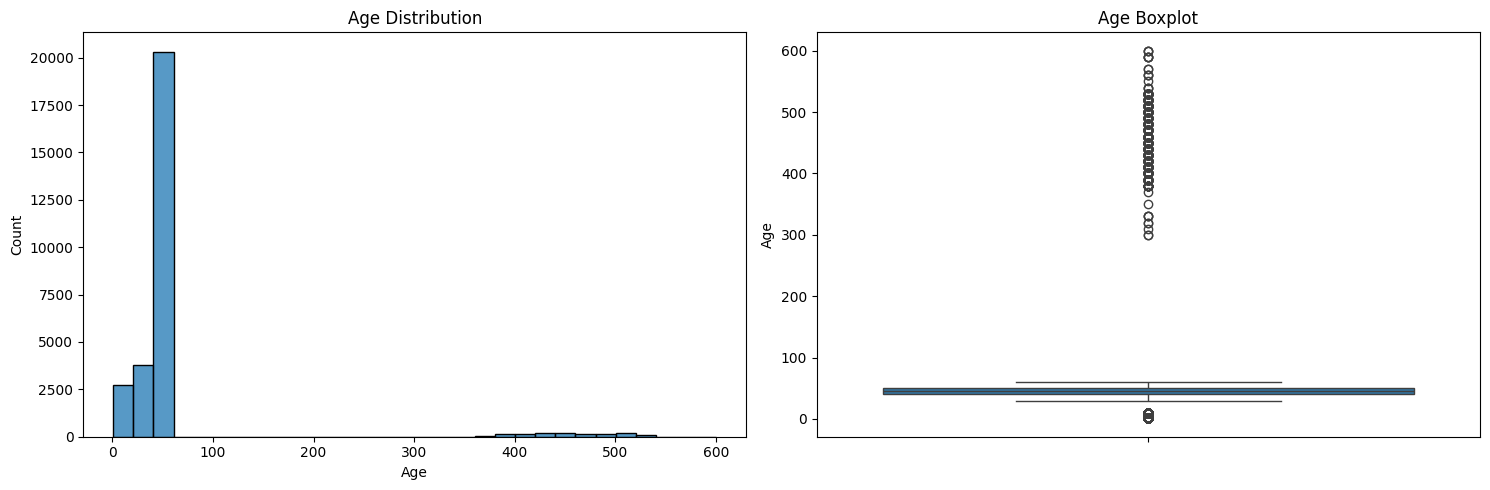

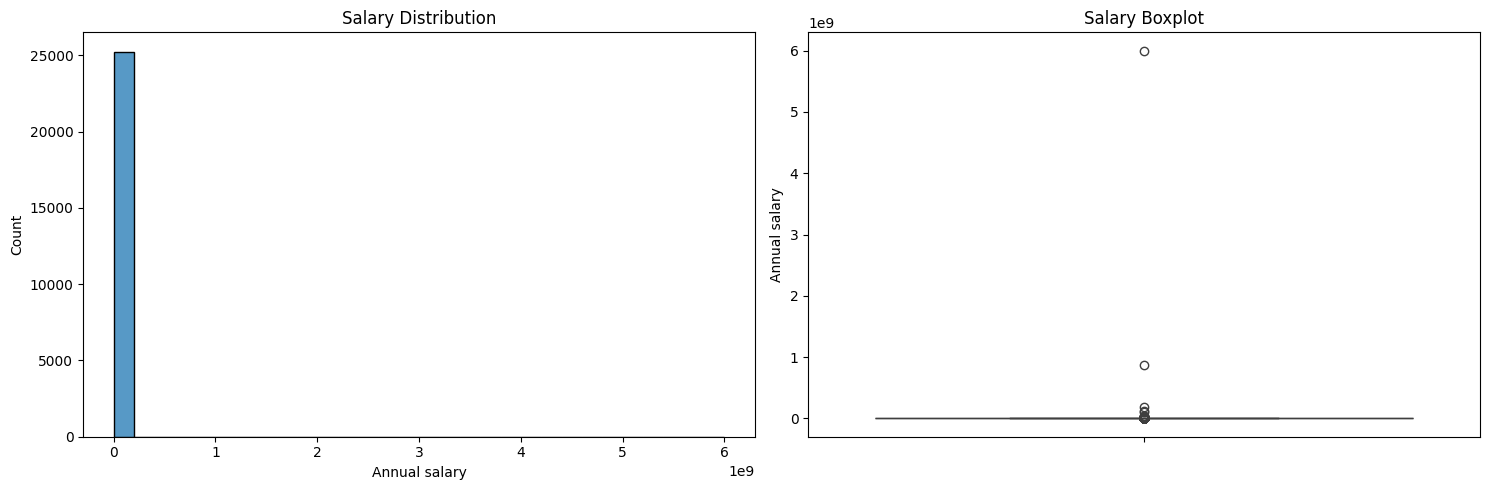

In [8]:
### Question 4: Distribution Analysis

plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(121)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')

plt.subplot(122)
sns.boxplot(data=df, y='Age')
plt.title('Age Boxplot')
plt.tight_layout()
plt.show()

# Salary distribution
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.histplot(data=df, x='Annual salary', bins=30)
plt.title('Salary Distribution')

plt.subplot(122)
sns.boxplot(data=df, y='Annual salary')
plt.title('Salary Boxplot')
plt.tight_layout()
plt.show()



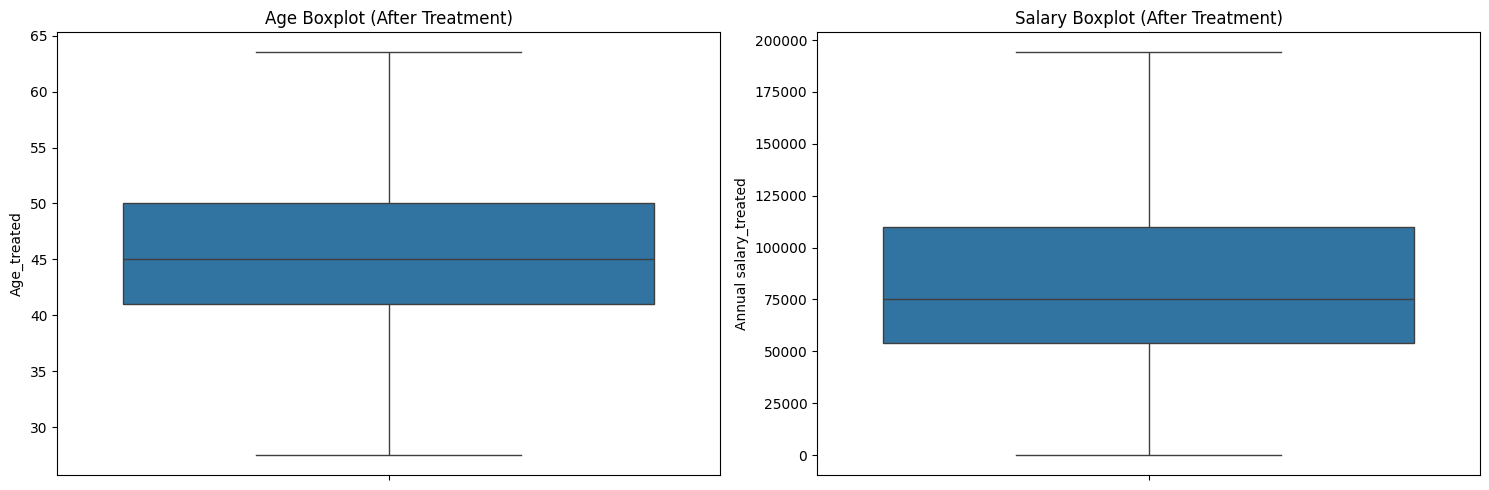

In [9]:
### Question 5: Outlier Treatment

def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f'{column}_treated'] = df[column].clip(lower_bound, upper_bound)
    return df

# Treat outliers for Age and Annual salary
df = treat_outliers(df, 'Age')
df = treat_outliers(df, 'Annual salary')

# Visualize treated data
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.boxplot(data=df, y='Age_treated')
plt.title('Age Boxplot (After Treatment)')

plt.subplot(122)
sns.boxplot(data=df, y='Annual salary_treated')
plt.title('Salary Boxplot (After Treatment)')
plt.tight_layout()
plt.show()



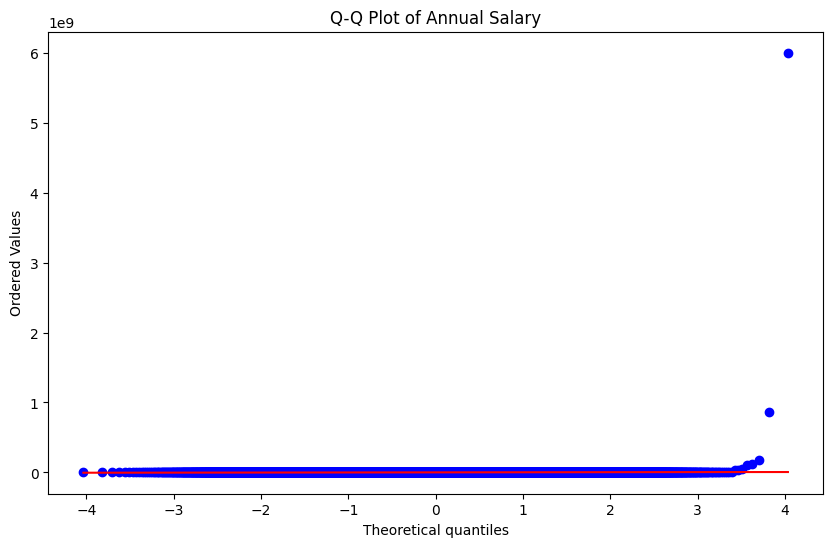

In [10]:
### Question 6: Q-Q Plot Analysis

plt.figure(figsize=(10, 6))
stats.probplot(df['Annual salary'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Annual Salary')
plt.show()



In [11]:
### Question 7: Correlation Analysis

numeric_cols = ['Age', 'Annual salary', 'Additional monetary compensation']
correlation_matrix = df[numeric_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                       Age  Annual salary  \
Age                               1.000000      -0.001144   
Annual salary                    -0.001144       1.000000   
Additional monetary compensation -0.001144       0.996491   

                                  Additional monetary compensation  
Age                                                      -0.001144  
Annual salary                                             0.996491  
Additional monetary compensation                          1.000000  


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000017BBA59AE80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

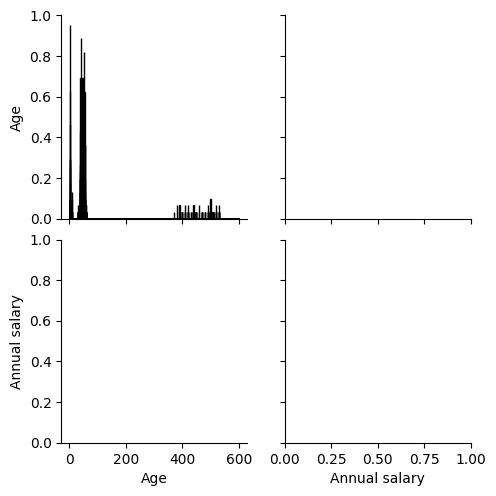

In [12]:
### Question 8: Pair Plot Analysis

# Sample 10,000 rows
sampled_df = df.sample(n=min(10000, len(df)), random_state=42)

# Create pair plot
sns.pairplot(sampled_df, 
             vars=['Age', 'Annual salary'],
             hue='Additional monetary compensation',
             diag_kind='hist')
plt.show()


In [ ]:
### Question 9: Hypothesis Testing

# Convert Annual salary to binary categories (above/below median)
median_salary = df['Annual salary'].median()
df['salary_category'] = df['Annual salary'].apply(lambda x: 'Above Median' if x > median_salary else 'Below Median')

# Perform Mann-Whitney U test
above_median = df[df['salary_category'] == 'Above Median']['Age']
below_median = df[df['salary_category'] == 'Below Median']['Age']
statistic, p_value = stats.mannwhitneyu(above_median, below_median)

print(f"Mann-Whitney U test results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")


In [ ]:
### Question 10: Margin of Error Calculation

def calculate_margin_of_error(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return margin_of_error

margin_of_error = calculate_margin_of_error(df['Age'].dropna())
print(f"Margin of Error for Age: {margin_of_error:.2f}")



Margin of Error for Age: 1.04


In [ ]:
### Question 11: Linear Regression

# Prepare data
X = df[['Annual salary', 'Additional monetary compensation']].fillna(0)
y = df['Age'].fillna(df['Age'].mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Predicted vs Actual Age')
plt.show()


In [ ]:
### Question 12: Feature Engineering

# Create ratio of salary to experience
df['salary_per_year_experience'] = df['Annual salary'] / df['Years of professional work experience overall'].map({
    '0-2 years': 1,
    '2-4 years': 3,
    '5-7 years': 6,
    '8-10 years': 9,
    '10+ years': 12
})

# Create total compensation ratio
df['total_compensation_ratio'] = (df['Annual salary'] + df['Additional monetary compensation']) / df['Annual salary']

print("New engineered features:")
print(df[['salary_per_year_experience', 'total_compensation_ratio']].describe())